In [ ]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

import sys
import matplotlib.pyplot as plt
import sklearn.decomposition as decomp
import sklearn.linear_model as linear_model
import sklearn.datasets as sk_data
from sklearn.preprocessing import StandardScaler
import numpy.linalg as nla
import sklearn.svm as svm
import pandas as pd

In [ ]:
# Data without anomaly
exam_data1 = np.array([[1, 2, 3, 4, 5], [57, 70, 76, 84, 91]]).T
print(exam_data1)

[[ 1 57]
 [ 2 70]
 [ 3 76]
 [ 4 84]
 [ 5 91]]


In [ ]:
# Data with anomaly
exam_data2 = np.array([[1, 2, 3, 4, 5], [57, 70, 99, 84, 91]]).T
print(exam_data2)

[[ 1 57]
 [ 2 70]
 [ 3 99]
 [ 4 84]
 [ 5 91]]


In [ ]:
# Plotting function
def plot_mb(m, b, ax, style):
    'plot a line y=mx+b on a matplotlib axis'
    xs = ax.get_xlim()
    ax.plot(xs, m*xs + b, style) # style is type of line

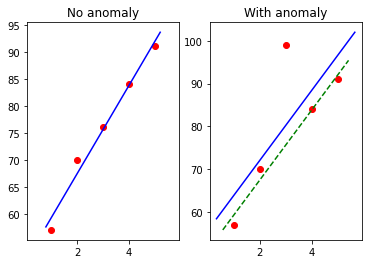

In [ ]:
# Plot both the types of data along with linear regression applied to it
fig, axes = plt.subplots(1,2,sharex=True)
x1 = exam_data1[:, 0:1]
y1 = exam_data1[:, 1]
# Fit a straight straight line to the linear data
lr1 = linear_model.LinearRegression().fit(x1, y1)
axes[0].plot(x1, y1, 'ro')
plot_mb(lr1.coef_, lr1.intercept_, axes[0], 'b-' )

x2 = exam_data2[:, 0:1]
y2 = exam_data2[:, 1]
# Fit a straight straight line to data with anomaly
lr2 = linear_model.LinearRegression().fit(x2, y2)
axes[1].plot(x2, y2, 'ro')
# Plot two linear fits: from data with anomaly and from normal data
plot_mb(lr1.coef_, lr1.intercept_, axes[1], 'g--') 
plot_mb(lr2.coef_, lr2.intercept_, axes[1], 'b-') 


axes[0].set_title('No anomaly')
axes[1].set_title('With anomaly')
plt.show()

In [ ]:
ftrs, tgt = exam_data1[:,0:1], exam_data1[:,1]
# Train the non-anomaly data 
lr_train = linear_model.LinearRegression().fit(ftrs, tgt) 
print(f'Slope: {lr_train.coef_}') 
print(f'Intercept: {lr_train.intercept_:.{3}}') 
print("-----------------------------")
print("Predicted value")
print(lr_train.predict(ftrs)) # testing on train data
print("-----------------------------")
print("Target")
print(tgt)
# Train scores = (target-predicted)^2
train_scores = (tgt - lr_train.predict(ftrs))**2 
print("-----------------------------")
print("Training scores:")
print(train_scores)

Slope: [8.2]
Intercept: 51.0
-----------------------------
Predicted value
[59.2 67.4 75.6 83.8 92. ]
-----------------------------
Target
[57 70 76 84 91]
-----------------------------
Training scores:
[4.84 6.76 0.16 0.04 1.  ]


In [ ]:
# Maximum of train_scores = 6.76, so for testing data, the test_scores ((target-predicted)^2) should not go beyond 6.76

In [ ]:
margin = 0.01 # just adding an error margin to the train score, to create a numerical threshold
threshold = max(train_scores) + margin
print(f'Threshold: {threshold:.{3}}')

Threshold: 6.77


In [ ]:
def do_linreg_anomaly_scores(train, test):
    ftrs, tgt = train[:,0:1], train[:,1] # train data features and target assignment
    lr_train = linear_model.LinearRegression().fit(ftrs, tgt) # train LR model on train data
    pred = lr_train.predict(test[:,0:1]) #predict test output
    anomaly_score = (test[:,1] - pred )**2 # test_scores
    return anomaly_score

In [ ]:
output = do_linreg_anomaly_scores(exam_data1, exam_data2)

In [ ]:
print("Train scores of original training data:")
print(train_scores)
print("-----------------------------")
print("Test score of current test data")
print(output)
print("-----------------------------")
print("Anomalies in the data with the help of the test scores:")
print([score for score in output if score > threshold])

Train scores of original training data:
[4.84 6.76 0.16 0.04 1.  ]
-----------------------------
Test score of current test data
[  4.84   6.76 547.56   0.04   1.  ]
-----------------------------
Anomalies in the data with the help of the test scores:
[547.5600000000003]


In [ ]:
# Conclusion is that we have an anomaly in the test data whose anomaly score is 547.5600000000003

# Principal Component Analysis

The original data is x2=x1/2

But the data contains an anomaly: [0.5, 0.26]

In [65]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

import sys
import matplotlib.pyplot as plt
import sklearn.decomposition as decomp
import sklearn.linear_model as linear_model
import sklearn.datasets as sk_data
from sklearn.preprocessing import StandardScaler
import numpy.linalg as nla
import sklearn.svm as svm
import pandas as pd

In [66]:
pca_example = np.array([[-3, -1.5], [-2.5, -1.25], [-1.5, -0.75], [-1, -0.5], [-0.5, -0.25], [0, 0], [0.5, 0.26], [1, 0.5],  [1.5, 0.75], [2.5, 1.25], [3, 1.5]])
print(pca_example)

[[-3.   -1.5 ]
 [-2.5  -1.25]
 [-1.5  -0.75]
 [-1.   -0.5 ]
 [-0.5  -0.25]
 [ 0.    0.  ]
 [ 0.5   0.26]
 [ 1.    0.5 ]
 [ 1.5   0.75]
 [ 2.5   1.25]
 [ 3.    1.5 ]]


In [67]:
# The difference of this anomaly with respect to the actual desired data is so less that it won't be detected by Linear Regression
# Therefore, we use principal component analysis

In [68]:
# find mean values along the vertical axes
mean_pca_example = np.mean(pca_example, axis=0, keepdims=True)
print("Mean of the columns")
mean_pca_example

Mean of the columns


array([[0.    , 0.0009]])

In [69]:
# both should be zero, but the mean of second axis 0.0009 because of the anomaly

In [70]:
# find variance along the vertical axes
var_pca_example = np.var(pca_example, axis=0, keepdims=True)
print("Variance of the columns")
var_pca_example

Variance of the columns


array([[3.4091, 0.8527]])

In [71]:
# scale the data with respect to variance square
scaled_pca_example = pca_example/np.sqrt(var_pca_example)
print("Scaled data")
print(scaled_pca_example)
print("-----------------------------")
# show the variances are equal
print("Variance of the columns")
scaled_pca_example.var(axis=0)

Scaled data
[[-1.6248 -1.6244]
 [-1.354  -1.3536]
 [-0.8124 -0.8122]
 [-0.5416 -0.5415]
 [-0.2708 -0.2707]
 [ 0.      0.    ]
 [ 0.2708  0.2816]
 [ 0.5416  0.5415]
 [ 0.8124  0.8122]
 [ 1.354   1.3536]
 [ 1.6248  1.6244]]
-----------------------------
Variance of the columns


array([1., 1.])

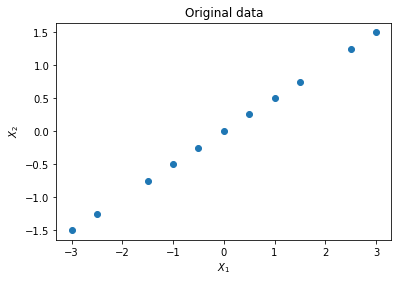

In [72]:
# Plot the data
fig, ax = plt.subplots()
ax.scatter(pca_example[:,0], pca_example[:,1])
ax.set_ylabel('$X_2$')
ax.set_xlabel('$X_1$')
ax.set_title('Original data')
plt.show()

In [73]:
# This data is with anomalies, and even if you apply LR, it will pass through the straight line, so we should apply PCA

In [74]:
pca = decomp.PCA(n_components=2) # decomposition object
pca.fit(scaled_pca_example) # train model on the scaled data, and not the original data

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

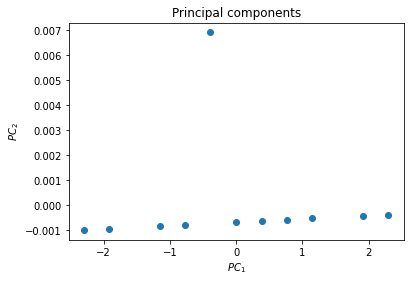

In [75]:
# Now plot the transformed scaled data which should show the anomaly clearly
pca_example_trf = pca.transform(scaled_pca_example) 
fig2, ax2 = plt.subplots()
ax2.scatter(pca_example_trf[:,0], pca_example_trf[:,1])
ax2.set_ylabel('$PC_2$')
ax2.set_xlabel('$PC_1$')
ax2.set_title('Principal components')
plt.show()

In [76]:
def get_1d_projected_vectors(obs, pca_object):
    # Note: The projection of vector a (data) along vector b (PC1)
    # is given by  [b / len(b)]* (len (a) cos (theta))
    # where theta is the angle between and b and the term in 
    # square parenthesis is a unit vector in the b direction
    #
    # Since cos (theta) = dot(a,b)/(len(a)len(b))
    # the projection can be written as
    # projs = b*[dot(a,b)/len(b)^2]
    #
    # The term in square parethenses is y_lengths
    # The projs is calculated adding back the mean
    # subtracted previously to center the data
    #
    # This is a very explicit way of handling the calculation.
    # See notes in "higher dimension" to see a way of generalizing
    # this to higher dimensions, while encapsulating the vector math.
    ssX = StandardScaler()
    centered_data = ssX.fit_transform(obs)
    pca_dirs = pca_object.components_
    
    y_lengths = centered_data.dot(pca_dirs.T) / pca_dirs.dot(pca_dirs.T) # divide dot product of scaled data . eigenvector by eigenvector . eigenvector^T
    centered_projs = y_lengths*(pca_dirs) # multiply that by eigenvector
    
    # Return the data to its original uncentered (and unscaled) positions
    return ssX.inverse_transform(centered_projs)

def do_pca_anomaly_scores(obs, pca_object):
    projected_vectors = get_1d_projected_vectors(obs, pca_object)    
    return nla.norm(obs-projs, axis=1)

In [77]:
# Function for doing 1D Principal Component Analysis to get the anomaly value that we found graphically
def do_1d_pca_anomaly_scores(obs):

    # for plotting original data:
    # fig = plt.figure(figsize=(20,7))
    # ax = fig.subplots(1,3)
    fig, ax = plt.subplots()
    ax.set_ylabel('$X_2$')
    ax.set_xlabel('$X_1$')
    ax.set_title('Original data with PCA')

    # categorize the data:
    x = pca_example[:,0:1]
    y = pca_example[:,1]

    # plot the original data
    ax.scatter(x,y, label='data')
    
    
    # Step 1: center and scale the data
    ssX = StandardScaler()
    centered_data = ssX.fit_transform(obs) # centered data = scaled data
    mean = ssX.mean_
    print("-----------------------------")
    print("Scaled data")
    print(centered_data)
    
    # plot mean of the scaled data
    ax.scatter(*mean.T, c='b', marker='^', label='mean') 


    # Step 2: compute prinicpal components
    # Here we focus on first PC  (greatest proportion of variance)
    pca = decomp.PCA(n_components=1)
    pca.fit_transform(centered_data)
    pca_dirs = pca.components_ # gives the eigenvectors (direction) of the components
    pca_eigenvalues = pca.explained_variance_ # gives the eigenvalues
    
    print("-----------------------------")
    print("PCA Eigenvalues:")
    print(pca_eigenvalues) 

    print("-----------------------------")
    print("PCA Components/Eigenvector:")
    print(pca_dirs) 

    # draw principal components
    pca_endpoints = np.r_[-3.5*ssX.inverse_transform(pca_dirs), 3.5*ssX.inverse_transform(pca_dirs)] # np.r_ does addition of the arguments, and 3.5 are the extreme values from our data to get endpoints
    print("-----------------------------")
    print("PCA Endpoints")
    print(pca_endpoints)
    ax.plot(*pca_endpoints.T, 'y', label='PC1') # line of the scaled data
    

    # Step 3: Project our examples onto the PCs
    projs = get_1d_projected_vectors(obs, pca)
    ax.plot(*projs.T, 'r.', label='projected data')
    ax.legend(loc='best')
    
    # Step 4: Calculate distance between original and projected examples
    # Step 5: Use the distance to score the anomalies
    # The distance is the Euclidean norm and 
    # we use it as the anomaly score
    return nla.norm(obs-projs, axis=1)
    

-----------------------------
Scaled data
[[-1.6248 -1.6254]
 [-1.354  -1.3546]
 [-0.8124 -0.8132]
 [-0.5416 -0.5424]
 [-0.2708 -0.2717]
 [ 0.     -0.001 ]
 [ 0.2708  0.2806]
 [ 0.5416  0.5405]
 [ 0.8124  0.8112]
 [ 1.354   1.3527]
 [ 1.6248  1.6234]]
-----------------------------
PCA Eigenvalues:
[2.2]
-----------------------------
PCA Components/Eigenvector:
[[-0.7071 -0.7071]]
-----------------------------
PCA Endpoints
[[ 4.5695  2.2822]
 [-4.5695 -2.2822]]


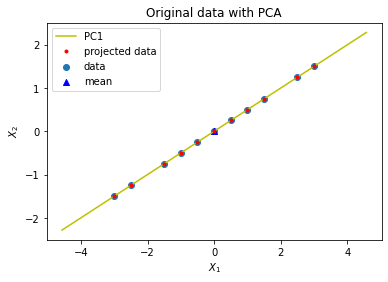

In [78]:
pca_example_scores = do_1d_pca_anomaly_scores(pca_example)

In [79]:
# Now that we have the projected values, the difference between them and the original data will give us the anomaly score

In [80]:
print("Anomaly scores:")
print(pca_example_scores)

Anomaly scores:
[0.0006 0.0006 0.0008 0.0009 0.0009 0.001  0.0101 0.0012 0.0012 0.0014
 0.0015]


In [81]:
print("Data with the max anomaly score:")
print(pca_example[np.argmax(pca_example_scores)])

Data with the max anomaly score:
[0.5  0.26]


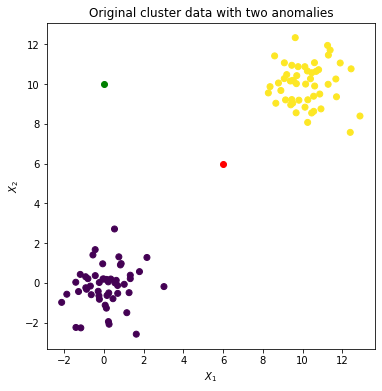

In [82]:
# Random dataset with some anomaly:
blobs_X, y = sk_data.make_blobs(centers=[[0,0], [10,10]])
figure, axes = plt.subplots(figsize=(6,6))
axes.scatter(*blobs_X.T, c=y)

spike_1 = np.array([[6.0,6.0]]) # Anomaly 1
spike_2 = np.array([[0.0,10]])  # Anomaly 2

axes.scatter(*spike_1.T, c='r')
axes.scatter(*spike_2.T, c='g')
axes.set_aspect('equal')
axes.set_ylabel('$X_2$')
axes.set_xlabel('$X_1$')
axes.set_title('Original cluster data with two anomalies')

# Combine the data so that the last two points are the anomalies
cluster_data = np.concatenate([blobs_X, spike_1, spike_2])

In [83]:
# We graphically saw that there is some anomaly in the data, now let us extract that anomaly:

-----------------------------
Scaled data
[[ 1.0897  1.1015]
 [ 1.2026  1.3548]
 [ 0.8684  1.0076]
 [-0.8593 -0.9877]
 [-0.905  -1.1166]
 [-0.9634 -1.085 ]
 [-1.2686 -1.3971]
 [ 0.7202  0.9881]
 [ 0.8409  0.7751]
 [ 0.621   0.8912]
 [ 0.9871  0.9775]
 [-1.0392 -0.9587]
 [-0.7944 -0.9763]
 [ 0.9797  1.1472]
 [ 0.7899  0.8232]
 [-0.9814 -1.18  ]
 [ 0.8602  0.7915]
 [-1.1717 -1.0097]
 [ 1.007   0.6036]
 [-0.968  -0.9284]
 [ 0.8603  1.0138]
 [-0.8899 -0.4364]
 [-0.7349 -0.8874]
 [ 1.0738  1.1862]
 [ 0.6946  0.7907]
 [-0.6761 -1.4628]
 [-0.951  -0.9523]
 [-0.8318 -0.7873]
 [-1.1269 -0.9933]
 [-1.0383 -1.122 ]
 [ 0.8938  0.6972]
 [ 1.0758  0.9587]
 [-1.151  -0.921 ]
 [-1.0796 -0.6378]
 [ 0.744   0.915 ]
 [ 1.2902  0.8534]
 [ 1.1258  0.8803]
 [-0.9463 -1.0602]
 [ 0.8962  0.9818]
 [ 1.0475  1.0883]
 [-0.5714 -0.7143]
 [-1.2702 -0.9561]
 [ 0.7773  1.0309]
 [-0.769  -1.2531]
 [ 1.0657  0.8591]
 [ 0.9     1.06  ]
 [-1.0789 -0.8913]
 [ 1.3267  1.1833]
 [-0.8583 -1.0647]
 [ 0.8013  1.0701]
 [ 1.425

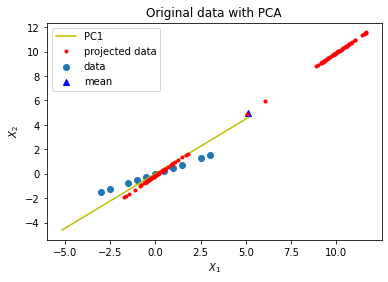

In [94]:
cluster_data_scores = do_1d_pca_anomaly_scores(cluster_data)

In [95]:
# Since we had manually added the np.r_ argument with 3.5 which was specific to the previous data, will not work in this data, but we can still see snomaly (blue dots going away from line)

In [96]:
print("Anomlay scores of this scaled random data:")
print(cluster_data_scores)
print("-----------------------------------------------------------------------")
print("Shape of the anomaly score array:")
print(cluster_data_scores.shape)

Anomlay scores of this scaled random data:
[0.0426 0.5533 0.5063 0.4667 0.7693 0.4418 0.4671 0.9738 0.239  0.9821
 0.0349 0.2927 0.6614 0.609  0.1212 0.7219 0.2497 0.589  1.4663 0.144
 0.5577 1.6481 0.5544 0.4085 0.3495 2.8594 0.0047 0.1619 0.4855 0.3041
 0.7144 0.4259 0.836  1.6059 0.6217 1.5874 0.8923 0.414  0.3111 0.1484
 0.5193 1.1418 0.922  1.7594 0.7512 0.5813 0.6817 0.5212 0.75   0.9768
 3.34   0.5091 0.1816 2.1601 0.656  1.419  0.2441 1.1258 1.9824 1.1296
 0.5059 0.0121 3.1069 0.0886 1.4623 0.3662 1.536  1.2756 1.4787 1.2603
 1.4969 0.8694 0.7131 1.1448 0.755  1.1174 0.021  0.8518 0.1632 0.8345
 1.2898 0.8319 0.9327 0.6757 2.0714 0.2973 0.1474 0.6203 0.0063 0.2888
 0.846  0.9317 0.1815 1.037  0.368  0.6697 0.02   0.2351 0.9862 0.2762
 0.0863 7.1621]
-----------------------------------------------------------------------
Shape of the anomaly score array:
(102,)


In [101]:
print("Anomaly score that is highly variable than the others:")
print(max(cluster_data_scores))
#print(min(cluster_data_scores))
print("------------------------------------------------------")
print("Data with that anomaly score:")
print(cluster_data[np.argmax(cluster_data_scores)])
#print(cluster_data[np.argmin(cluster_data_scores)])

Anomaly score that is highly variable than the others:
7.162079909600653
------------------------------------------------------
Data with that anomaly score:
[ 0. 10.]


# Support Vector Machine

Detecting anomaly with the help of SVM

In [153]:
def do_svm_anomaly_scores(obs):
    
    oc_svm = svm.OneClassSVM(gamma='auto').fit(obs)
    scores = oc_svm.decision_function(obs).flatten()
    
    # Find the largest score and use it to normalize the scores 
    max_score = np.max(np.abs(scores))
    #scores = -scores/max_score
    # scores from oc_svm use "negative is anomaly"
    # To follow our previous convention
    # we multiply by -1 and divide by the maximum score to get scores
    # in the range [-1, 1] with positive values indicating anomalies
    return -scores/max_score

In [154]:
# print("The data is:")
# print(cluster_data)
# print("-------------------------------------------------------------------------")

print("Anomaly scores from the cluster data:")
print(do_svm_anomaly_scores(cluster_data))
print("-------------------------------------------------------------------------")

anomaly_scores = do_svm_anomaly_scores(cluster_data)
anomaly_scores.sort()
print("Top 5 anomaly scores:")
print(anomaly_scores[-5:])
print("-------------------------------------------------------------------------")

print("Anomaly data with the highest anomaly score:")
print(cluster_data[np.argmax(anomaly_scores)])
print("-------------------------------------------------------------------------")

print("Indexes of the highest 5 anomaly scores:")
print(do_svm_anomaly_scores(cluster_data).argsort()[-5:])
print("-------------------------------------------------------------------------")

x = do_svm_anomaly_scores(cluster_data)
point = np.argmax(x)
print("Anomaly data index:")
print(point) # index of highest anomaly data
print("-------------------------------------------------------------------------")

print("Anomaly data:")
print(cluster_data[point]) # anomaly data by point

Anomaly scores from the cluster data:
[-0.0283  0.236  -0.0451 -0.0269 -0.0024 -0.0064  0.4653  0.      0.
  0.2173 -0.0079 -0.0237 -0.0147  0.0023 -0.0027  0.     -0.0292 -0.0291
  0.2083 -0.0321 -0.0468  0.7021  0.     -0.0089  0.178   0.6919 -0.0283
 -0.0163 -0.0308  0.      0.0588 -0.0074 -0.0203  0.276  -0.0198  0.1684
 -0.0126 -0.0083 -0.0378 -0.0121  0.4749  0.0593 -0.0387  0.2089 -0.0371
 -0.0281 -0.0264  0.0767 -0.0001 -0.0338  0.7437 -0.0276  0.031   0.7427
  0.4156  0.1412 -0.0301  0.0126  0.5476  0.0845  0.0845 -0.0409  0.7133
 -0.0445  0.0375 -0.0624  0.1926  0.0112  0.0854  0.0732  0.1941  0.0068
  0.0087  0.1522  0.1473  0.3367 -0.0104  0.     -0.0039  0.0001 -0.0001
 -0.0542  0.0305  0.0058  0.3631  0.1346 -0.0108 -0.0529 -0.0399 -0.0297
  0.      0.3667 -0.      0.1957 -0.0059 -0.0614 -0.0026 -0.0444  0.
 -0.0351  0.9999  1.    ]
-------------------------------------------------------------------------
Top 5 anomaly scores:
[0.7133 0.7427 0.7437 0.9999 1.    ]
--------